# Logistic Regression

Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

In [3]:
# Imports
import numpy as np
import random
import sklearn

In [4]:
# Importing the train_test_splitter and the evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 

In [5]:
# Input X should be in the form of a 2d array
# The way scikit learn implements it
# X = [[a,b],
#      [c,d]]
# y and targets must in the format of a one dimensional array of binary values here

<img src="../Images/neuron.png">

______________________________________________________________________________________________________________________

<img src="../Images/cross_entropy.png">

In [6]:
# Without Validation check
class LogisticRegression:
    def __init__(self, lr=0.0001, num_iters=100000):
        self.lr = lr
        self.num_iters = num_iters
    
    def __add_ones(self, X):
        ones = np.ones((X.shape[0], 1))
        return np.concatenate((ones, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def __cross_entropy(self, t, y):
        return (-y * np.log(t) - (1 - y) * np.log(1 - t)).mean()
    
    def fit(self, X, y):

        X = self.__add_ones(X)
        
        # weights initialization
        self.W = np.random.randn(X.shape[1])
        
        for _ in range(self.num_iters):
            z = np.dot(X, self.W)
            t = self.__sigmoid(z)
            grad = np.dot(X.T, (t - y))
            self.W -= self.lr * grad
            
            if _%10000 == 0:
                print('Loss: ',self.__cross_entropy(t, y))
    
    def __prob(self, X):
        X = self.__add_ones(X)
        return self.__sigmoid(np.dot(X, self.W))
    
    def predict(self, X):
        return np.round(self.__prob(X))

In [7]:
# with validation scores
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


class LogisticRegression:
    def __init__(self, lr=0.0001, num_iters=100000):
        self.lr = lr
        self.num_iters = num_iters
    
    def __add_ones(self, X):
        ones = np.ones((X.shape[0], 1))
        return np.concatenate((ones, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def __cross_entropy(self, t, y):
        return (-y * np.log(t) - (1 - y) * np.log(1 - t)).mean()
    
    def fit(self, X, y, X_val, y_val):

        X = self.__add_ones(X)
        X_val = self.__add_ones(X_val)
        
        # weights initialization
        self.W = np.random.randn(X.shape[1])
        loss_val = []
        loss_train = []
        i_list = []
        
        for _ in range(self.num_iters):
            z = np.dot(X, self.W)
            t = self.__sigmoid(z)
            grad = np.dot(X.T, (t - y))
            self.W -= self.lr * grad
            
            if _%(self.num_iters/20) == 0:
                matmul1 = np.dot(X_val, self.W)
                x_val_pred = np.round(self.__sigmoid(matmul1))
                loss = self.__cross_entropy(y_val,x_val_pred)
                loss_val.append(loss)
                loss_train.append(self.__cross_entropy(t, y))
                
                
                i_list.append(_)
                print("Training iteration: {} ".format(_))
                print(' Training Loss: ',self.__cross_entropy(t, y))
                

                        
        plt.plot(i_list,loss_val,'g-',label = "Validation loss")
        plt.plot(i_list,loss_train,'b--',label = "Training loss")
        plt.title("Training and validation Losses")
        plt.xlabel("Iterations")
        plt.ylabel("Loss")
        plt.show()
                
                
                
    
    def __prob(self, X):
        X = self.__add_ones(X)
        return self.__sigmoid(np.dot(X, self.W))
    
    def predict(self, X):
        return np.round(self.__prob(X))

## Training the model on the AND gate

In [8]:
# Preparing the data

X = []
y = []
b = [[0,1],[1,0],[1,1],[0,0]]
for i in range(1000):
    p = random.choice(b)
    X.append(p)
    y.append(p[0] or p[1])
X = np.array(X)
y = np.array(y)

In [9]:
lr = LogisticRegression(lr = 0.003)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

C:\Users\prana\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
C:\Users\prana\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in multiply


Training iteration: 0 
 Training Loss:  0.39924290101612125
Training iteration: 5000 
 Training Loss:  0.0006695280562423601
Training iteration: 10000 
 Training Loss:  0.00033416609173803595
Training iteration: 15000 
 Training Loss:  0.00022262288914228935
Training iteration: 20000 
 Training Loss:  0.0001669042430656227
Training iteration: 25000 
 Training Loss:  0.00013349144206905767
Training iteration: 30000 
 Training Loss:  0.00011122434844831448
Training iteration: 35000 
 Training Loss:  9.532342721887973e-05
Training iteration: 40000 
 Training Loss:  8.340008338256428e-05
Training iteration: 45000 
 Training Loss:  7.412780312920038e-05
Training iteration: 50000 
 Training Loss:  6.671090339281325e-05
Training iteration: 55000 
 Training Loss:  6.064315539224024e-05
Training iteration: 60000 
 Training Loss:  5.558713632605695e-05
Training iteration: 65000 
 Training Loss:  5.130928240897816e-05
Training iteration: 70000 
 Training Loss:  4.764278465559466e-05
Training iter

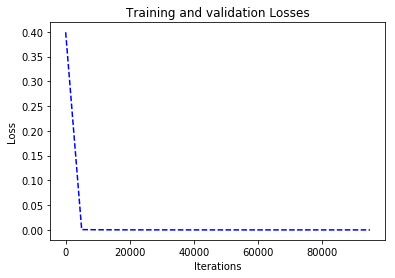

In [11]:
lr.fit(X = X_train,y = y_train,X_val=X_test,y_val=y_test)

In [12]:
predictions = lr.predict(X_test)

In [13]:
for i in [accuracy_score,confusion_matrix,classification_report]:
    print(i(y_test,predictions))
    print()
    print("------------------------------------------------------")

1.0

------------------------------------------------------
[[20  0]
 [ 0 80]]

------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        80

   micro avg       1.00      1.00      1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100


------------------------------------------------------


## Logistic Regression using Sklearn

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
logr = LogisticRegression()

In [ ]:
accuracy_score()

In [16]:
logr.fit(X=X_train,y= y_train)

C:\Users\prana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
predictions = logr.predict(X_test)

In [18]:
def metrics(Predictions,True_values):
    for i in [accuracy_score,confusion_matrix,classification_report ]:
        print(i(True_values,Predictions))
        print()

In [19]:
metrics(predictions,y_test)

1.0

[[20  0]
 [ 0 80]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        80

   micro avg       1.00      1.00      1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100


